# Clustering Demo

This notebook demonstrates how to use LATTE ☕ for hierarchical clustering analysis of text data from Stack Exchange datasets. We'll explore clustering at different levels and visualise results grouped by various attributes.


In [1]:
import pandas as pd
from Latte import Latte
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

project_to_field = {'biology': 'Science','chemistry': 'Science','physics': 'Science','ell': 'Language','english': 'Language','linguistics': 'Language','graphicdesign': 'Design','photo': 'Design','gamedev': 'Tech','softwareengineering': 'Tech', 'computergraphics': 'Tech'}

## Setup and Data Preparation

First, we'll set up the environment and define helper functions to categorise our Stack Exchange data by field (Science, Language, Design, Tech).


In [2]:
def get_masks(df):
    df['field'] = df['project'].map(project_to_field)

    mask1 = np.array(df['field'] == 'Science') * 1
    mask2 = np.array(df['field'] == 'Language') * 2
    mask3 = np.array(df['field'] == 'Design') * 3
    mask4 = np.array(df['field'] == 'Tech') * 4

    df['project_tags'] = df['project'] + '_' + df['tags']
    masks = {
        'field': mask1 + mask2 + mask3 + mask4,
        'tag': pd.factorize(df['project_tags'])[0] + 1,
        'project': pd.factorize(df['project'])[0] + 1
    }
    return masks

In [3]:
sample_size = 100
df = pd.read_csv(f'data/sample_{sample_size}.csv')
masks = get_masks(df)

## Load Data and Run Analysis

Load a sample dataset and run the LATTE pipeline: embedding → dimensionality reduction → clustering.


In [4]:
latte = Latte(df, mute = True)
latte.embed('file', embeddings_file=f'embeddings/sample_{sample_size}_gemini.pkl').reduce(50, 0.0).cluster(20, 10)

## Visualization at Different Levels

Now we'll visualize the clustering results at different hierarchical levels, colored by different grouping attributes.


### Clustering by Field (Science, Language, Design, Tech)


<Axes: >

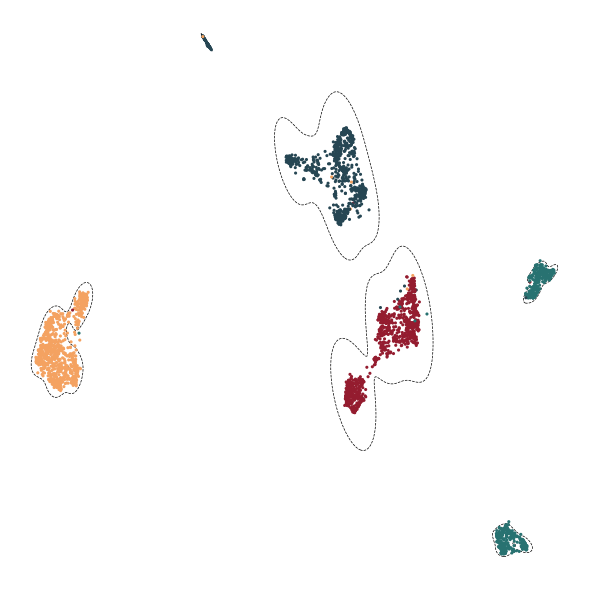

In [5]:
latte.plot(groups = masks['field'], cluster_level=32, marker_size=5)

### Clustering by Project (Individual Stack Exchange Sites)


<Axes: >

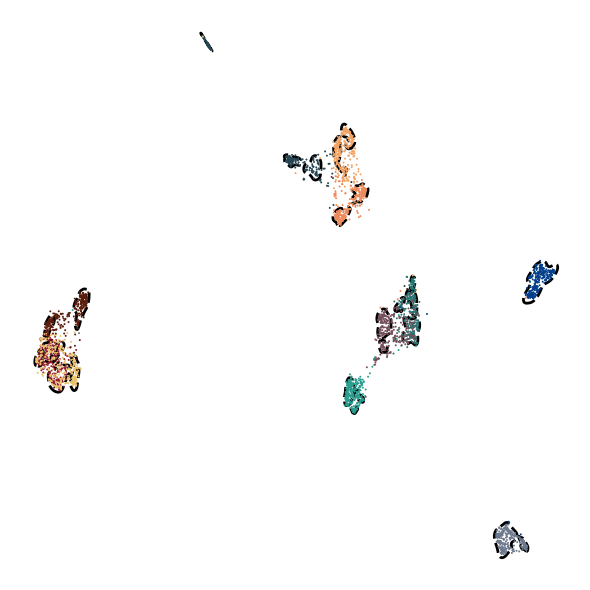

In [6]:
latte.plot(groups = masks['project'], cluster_level=10, marker_size=2, line_width=2)

### Clustering by Tags (Project + Tag Combinations)

<Axes: >

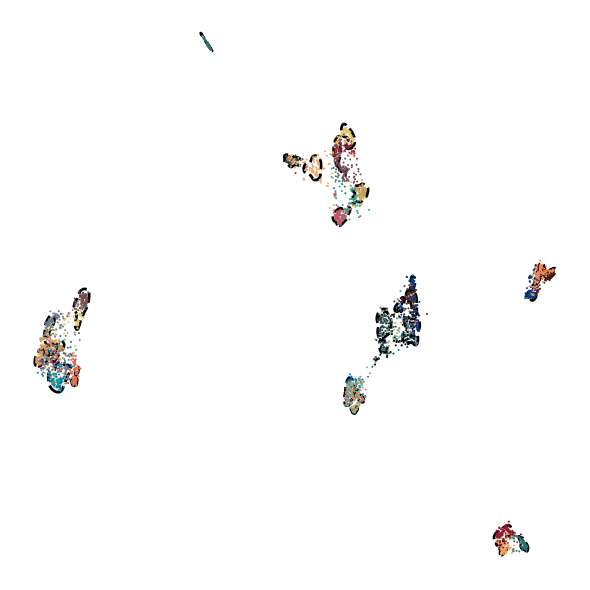

In [7]:
latte.plot(groups = masks['tag'], cluster_level=5, marker_size=2, line_width=2)